/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1912.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1906.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/2002.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1899.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1866.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1872.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1873.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1867.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1898.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/2003.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1905.txt/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1907.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1913.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1939.txt

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/2001

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1982.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1955.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1941.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1969.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1808.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1809.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1821.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1834.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1835.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1820.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1940.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1968.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1954.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1983.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1927

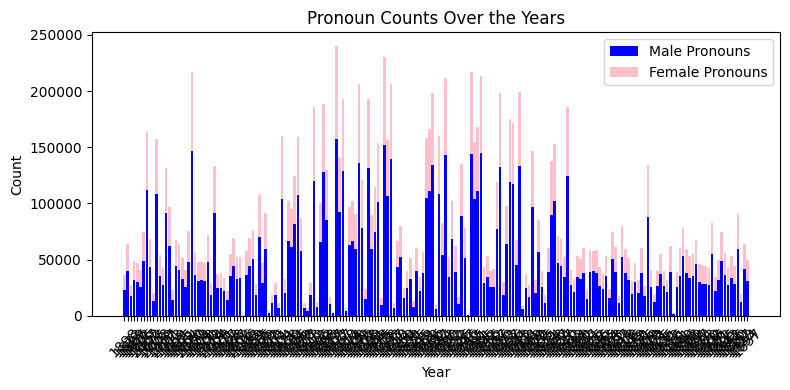

In [1]:
import os
import re
import threading
import matplotlib.pyplot as plt

# Function to count male and female pronouns in a file
def count_pronouns(filename, result_dict, year):
    male_pronouns = ["he", "him", "his"]
    female_pronouns = ["she", "her", "hers"]

    with open(filename, 'r', encoding='utf-8') as file:
        print(filename)
        content = file.read().lower()
        male_count = sum(content.count(p) for p in male_pronouns)
        female_count = sum(content.count(p) for p in female_pronouns)
        
        # Use a lock to protect the shared result_dict
        with result_lock:
            if year not in result_dict:
                result_dict[year] = {'Male Pronouns': 0, 'Female Pronouns': 0}
            
            result_dict[year]['Male Pronouns'] += male_count
            result_dict[year]['Female Pronouns'] += female_count

# Function to plot pronoun counts for a year
def plot_pronoun_counts(result_dict):
    years = list(result_dict.keys())
    male_counts = [result_dict[year]['Male Pronouns'] for year in years]
    female_counts = [result_dict[year]['Female Pronouns'] for year in years]

    plt.figure(figsize=(50, 30))
    plt.bar(years, male_counts, label='Male Pronouns', color='blue')
    plt.bar(years, female_counts, label='Female Pronouns', bottom=male_counts, color='pink')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Pronoun Counts Over the Years')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pronoun_counts.png')
    plt.show()

# Directory where the text files are located
directory ="/Users/praharshita/Desktop/Capstone/cleaned_files_by_year"

# List of filenames in the directory
filenames = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

# Dictionary to store results (male and female pronoun counts) for each year
result_dict = {}
result_lock = threading.Lock()

# Create threads to process files concurrently
threads = []
for filename in filenames:
    year = os.path.splitext(filename)[0]
    thread = threading.Thread(target=count_pronouns, args=(os.path.join(directory, filename), result_dict, year))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Plot pronoun counts for each year
plot_pronoun_counts(result_dict)


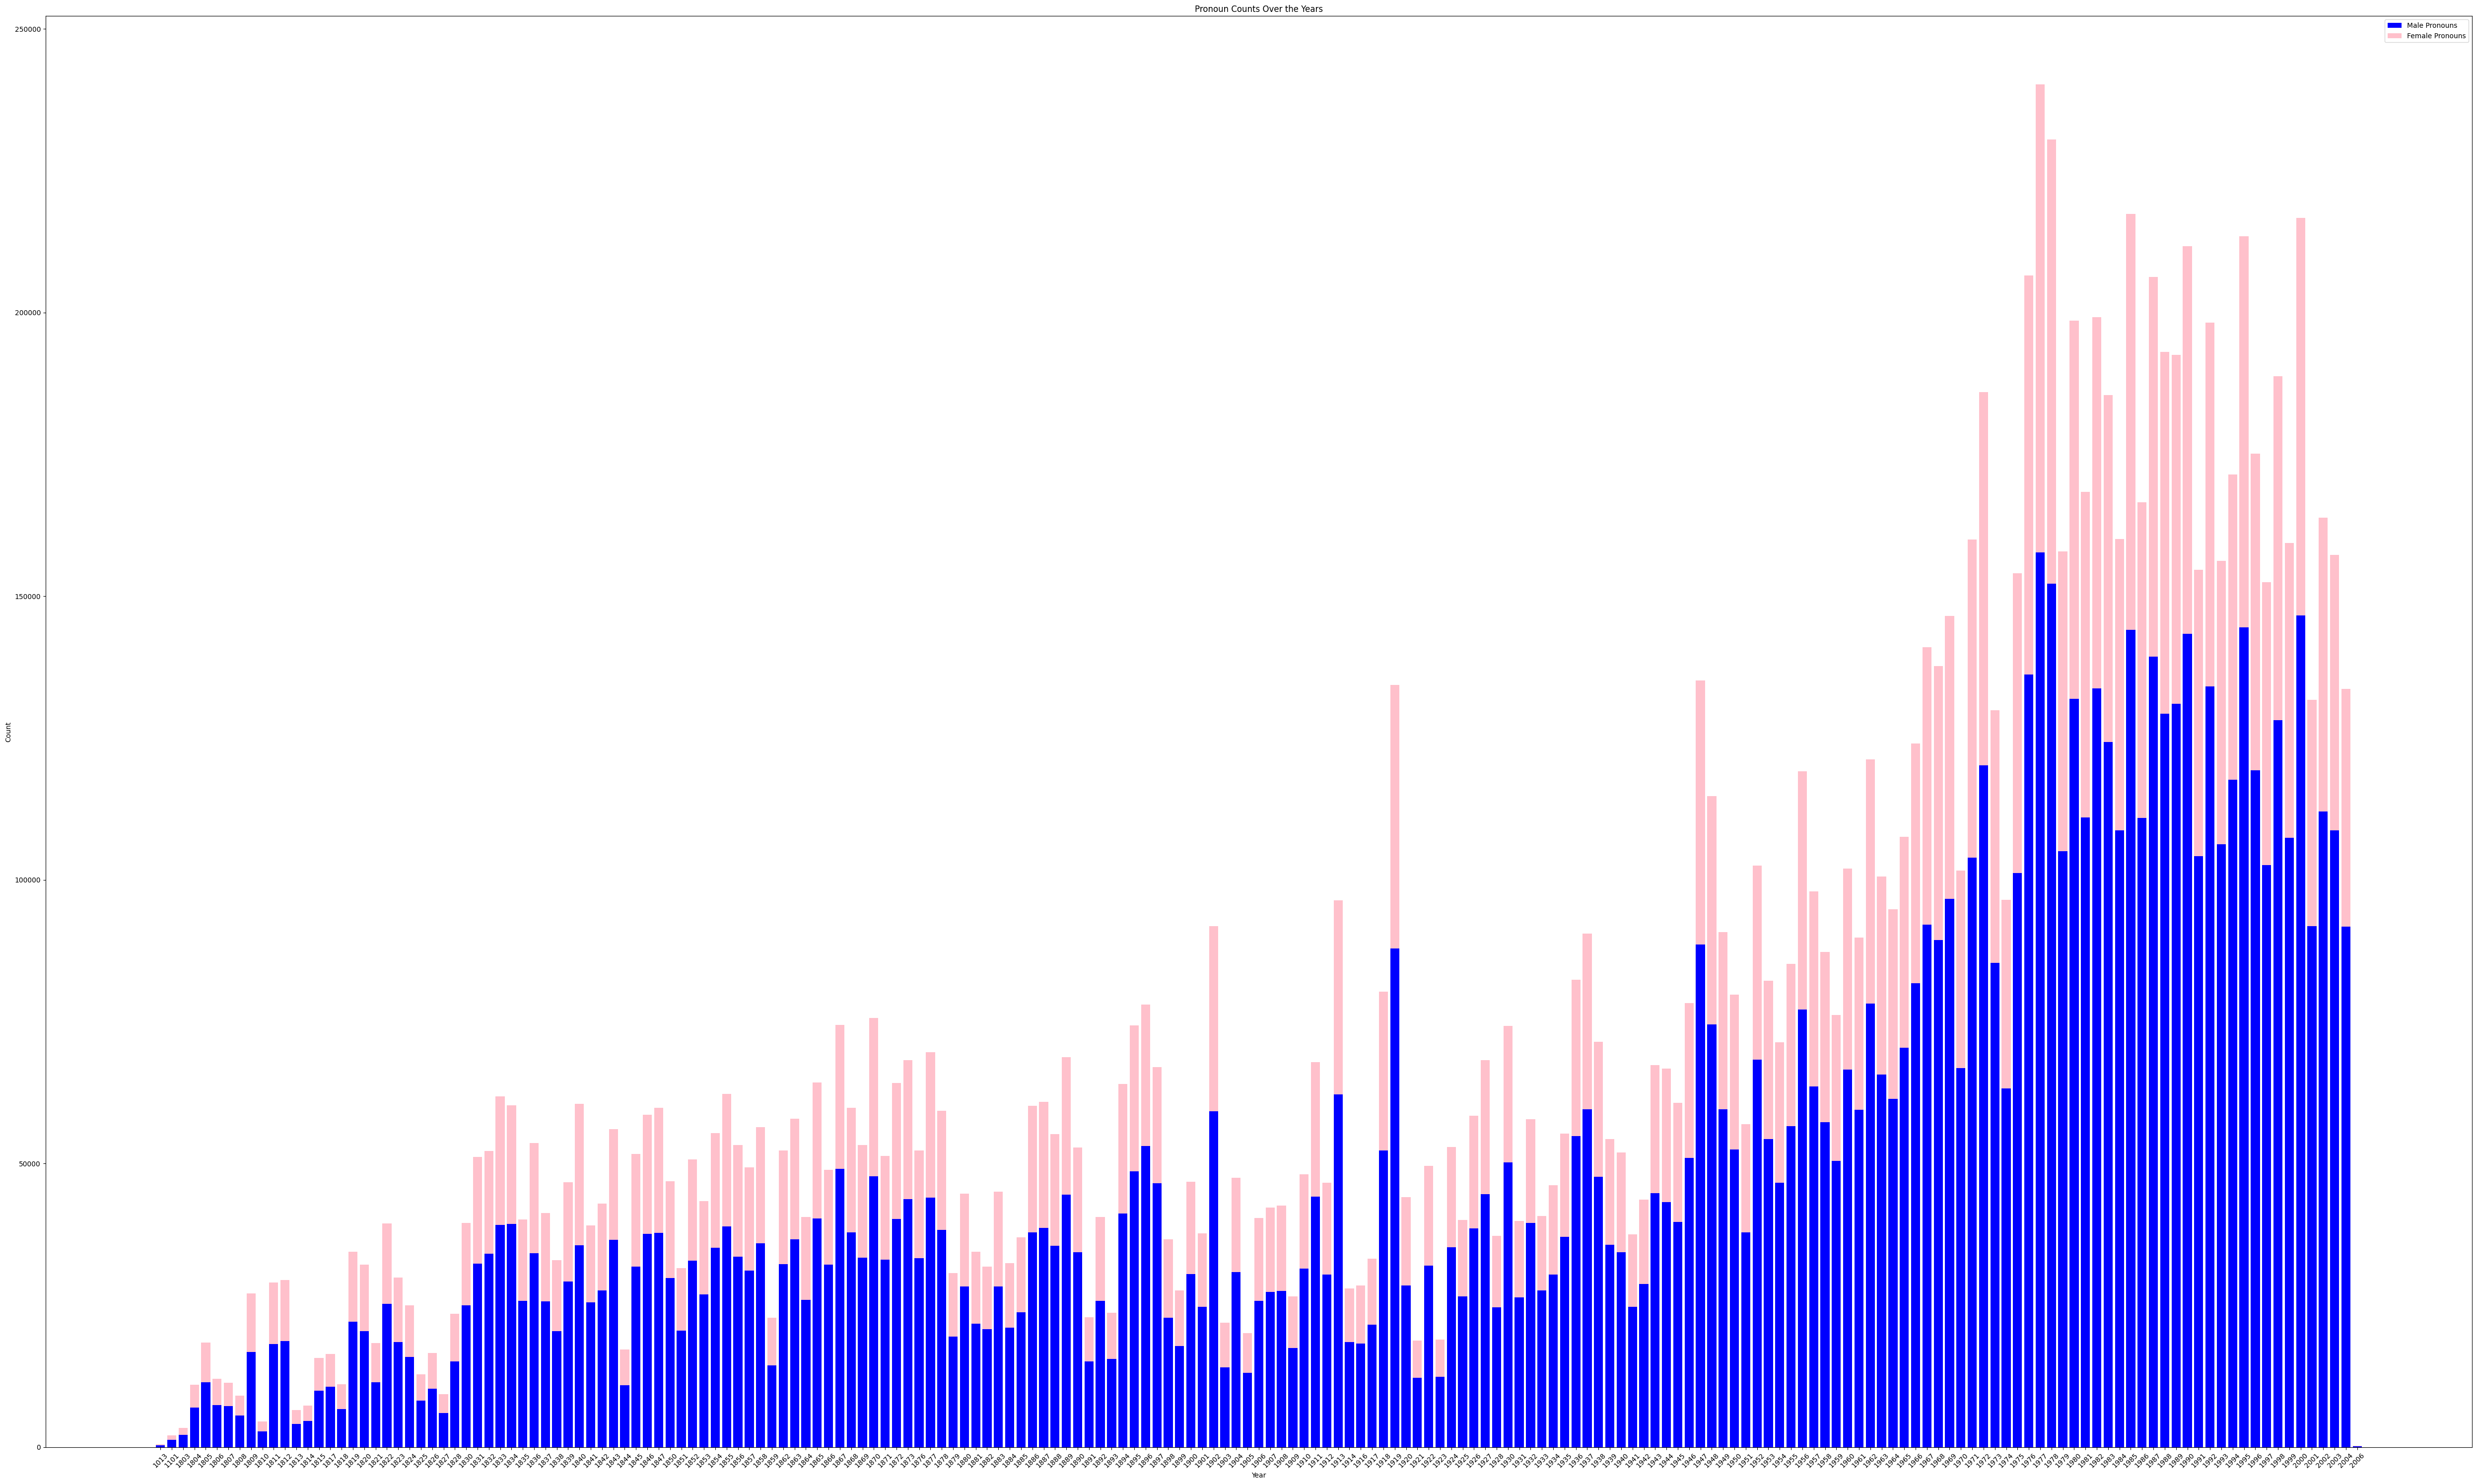

In [5]:
def plot_pronoun_counts(result_dict):
    sorted_years = sorted(result_dict.keys())
    male_counts = [result_dict[year]['Male Pronouns'] for year in sorted_years]
    female_counts = [result_dict[year]['Female Pronouns'] for year in sorted_years]

    plt.figure(figsize=(50, 30))
    plt.bar(sorted_years, male_counts, label='Male Pronouns', color='blue')
    plt.bar(sorted_years, female_counts, label='Female Pronouns', color='pink')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Pronoun Counts Over the Years')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pronoun_counts.png')
    plt.show()

plot_pronoun_counts(result_dict)

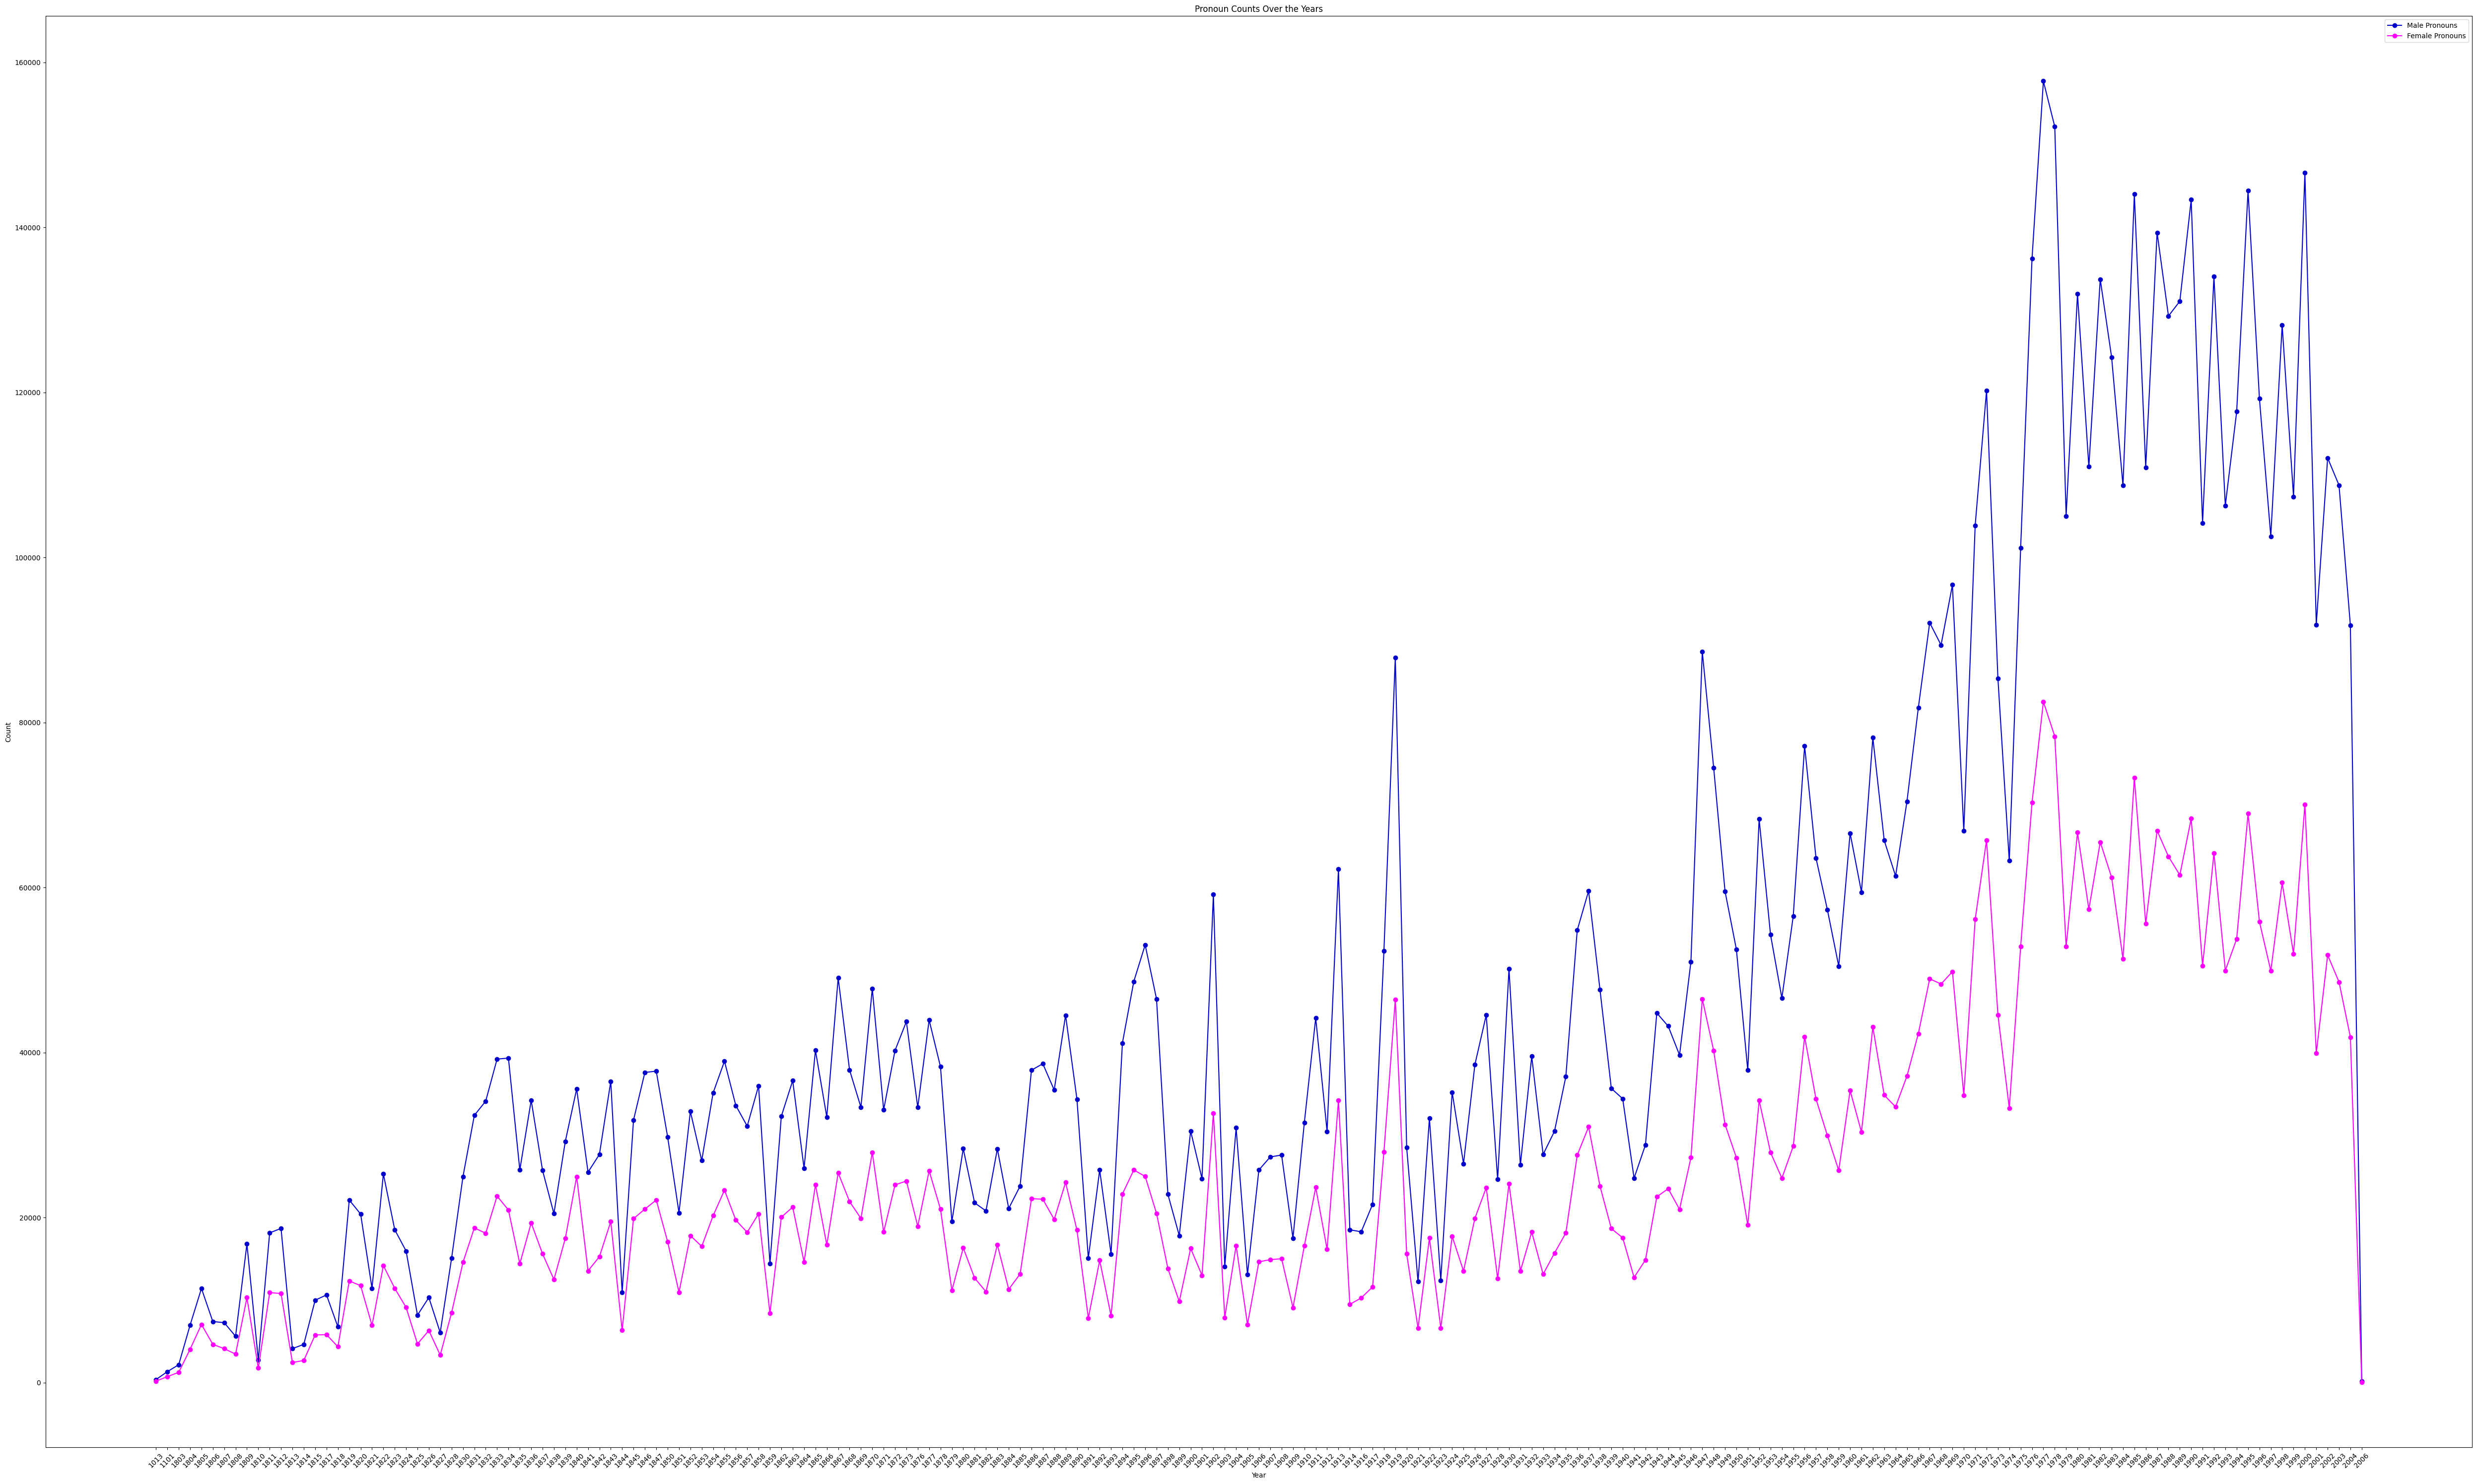

In [13]:
def plot_pronoun_counts_line(result_dict):
    sorted_years = sorted(result_dict.keys())
    male_counts = [result_dict[year]['Male Pronouns'] for year in sorted_years]
    female_counts = [result_dict[year]['Female Pronouns'] for year in sorted_years]

    plt.figure(figsize=(50, 30))
    plt.plot(sorted_years, male_counts, label='Male Pronouns', marker='o', linestyle='-', color='mediumblue')
    plt.plot(sorted_years, female_counts, label='Female Pronouns',  marker='o', linestyle='-', color='fuchsia')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Pronoun Counts Over the Years')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pronoun_counts.png')
    plt.show()

plot_pronoun_counts_line(result_dict)

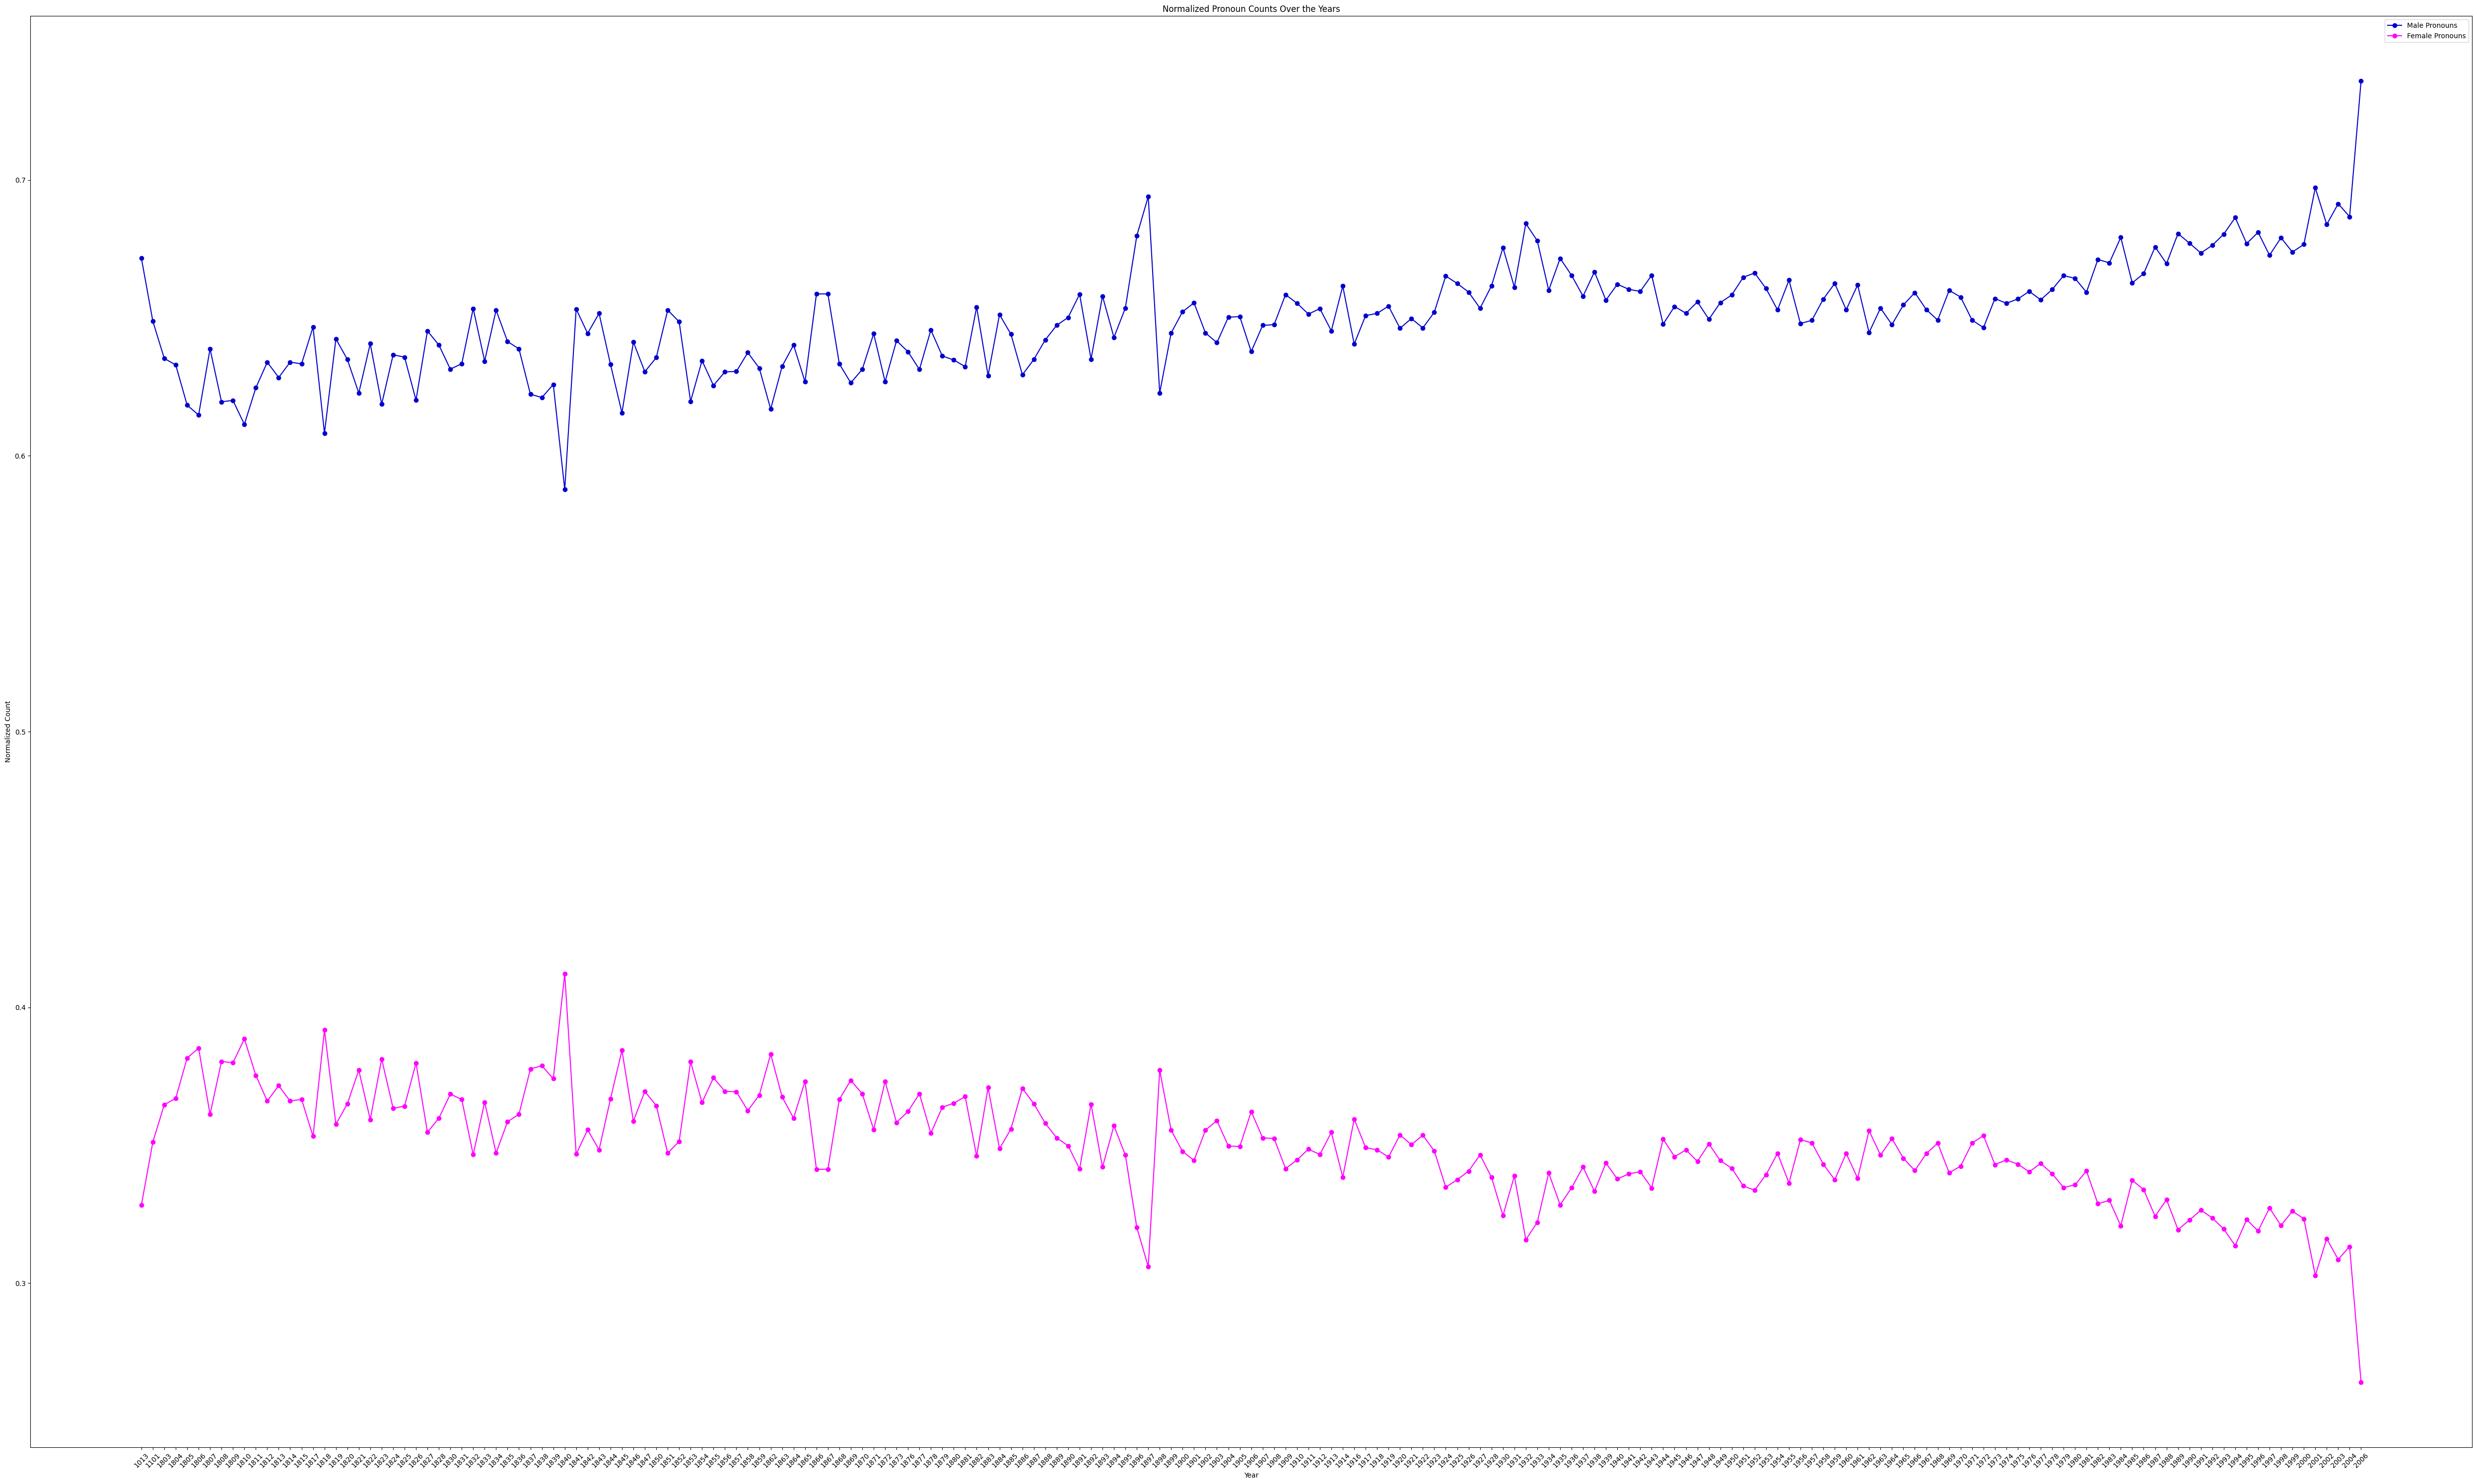

In [14]:
# Function to normalize counts in result_dict
def normalize_counts(result_dict):
    for year in result_dict:
        male_count = result_dict[year]['Male Pronouns']
        female_count = result_dict[year]['Female Pronouns']
        
        # Normalize the counts by dividing by the total pronoun count for that year
        total_count = male_count + female_count
        if total_count > 0:
            result_dict[year]['Male Pronouns'] = male_count / total_count
            result_dict[year]['Female Pronouns'] = female_count / total_count

# Function to plot pronoun counts for a year as a line graph
def plot_pronoun_counts_line(result_dict):
    sorted_years = sorted(result_dict.keys())
    male_normalized_counts = [result_dict[year]['Male Pronouns'] for year in sorted_years]
    female_normalized_counts = [result_dict[year]['Female Pronouns'] for year in sorted_years]
    plt.figure(figsize=(50, 30))
    plt.plot(sorted_years, male_normalized_counts, label='Male Pronouns', marker='o', linestyle='-', color='mediumblue')
    plt.plot(sorted_years, female_normalized_counts, label='Female Pronouns', marker='o', linestyle='-', color='fuchsia')
    plt.xlabel('Year')
    plt.ylabel('Normalized Count')
    plt.title('Normalized Pronoun Counts Over the Years')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('normalized_pronoun_counts.png')
    plt.show()
    
normalize_counts(result_dict)    
plot_pronoun_counts_line(result_dict)